In [4]:
!pip install transformers

     |████████████████████████████████| 7.7 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 131.9 MB/s eta 0:00:01
     |████████████████████████████████| 776 kB 127.9 MB/s eta 0:00:01
ERROR: tokenizers 0.14.1 has requirement huggingface_hub<0.18,>=0.16.4, but you'll have huggingface-hub 0.18.0 which is incompatible.


In [5]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')

tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")
['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']

(…)gpt2-base-v2/resolve/main/tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

(…)/kogpt2-base-v2/resolve/main/config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


['▁안녕',
 '하',
 '세',
 '요.',
 '▁한국어',
 '▁G',
 'P',
 'T',
 '-2',
 '▁입',
 '니다.',
 '😤',
 ':)',
 'l^o']

In [6]:
import torch
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
text = '근육이 커지기 위해서는'
input_ids = tokenizer.encode(text, return_tensors='pt')
gen_ids = model.generate(input_ids,
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True)
generated = tokenizer.decode(gen_ids[0])
print(generated)

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

근육이 커지기 위해서는 무엇보다 규칙적인 생활습관이 중요하다.
특히, 아침식사는 단백질과 비타민이 풍부한 과일과 채소를 많이 섭취하는 것이 좋다.
또한 하루 30분 이상 충분한 수면을 취하는 것도 도움이 된다.
아침 식사를 거르지 않고 규칙적으로 운동을 하면 혈액순환에 도움을 줄 뿐만 아니라 신진대사를 촉진해 체내 노폐물을 배출하고 혈압을 낮춰준다.
운동은 하루에 10분 정도만 하는 게 좋으며 운동 후에는 반드시 스트레칭을 통해 근육량을 늘리고 유연성을 높여야 한다.
운동 후 바로 잠자리에 드는 것은 피해야 하며 특히 아침에 일어나면 몸이 피곤해지기 때문에 무리하게 움직이면 오히려 역효과가 날 수도 있다.
운동을


# 노래가사 일부분 입력받아 노래가사 생성 모델

In [14]:
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
import re

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")
text = """ 매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서 괜찮아.
그런데 왜 이렇게 입고 다니냐고?
너랑 같이 입어라!
이거 뭐야? 이게 무슨 짓이야! 내가 니가 좋아하는 거잖아, 나 지금 어디 있어.</d> 오늘은 어떤 분을 소개해 드릴까요?
오늘의 주제는 바로 '우리 시대의 가장 큰 문제'입니다.
저도 그 문제에 대해서 좀 더 깊이 있게 고민하고 싶습니다.
먼저, 김지영 기자 나와 있습니다.
어서 오십시오, 안녕하세요.
네. 저는 이제 막 고등학교를 졸업하고 대학 진학을 준비하던 중이었어요.
그래서, 제가 대학교에


# Data Preprocessing _ IU노래 4곡

In [19]:
import os

with open('./kr_lyrics_20_preprocess.txt', 'r', encoding='utf-8') as f:
    data = f.read()
data=" ".join(data.split())
# print(len(data))
data = data.replace('\n|\t', ' ')
data = re.sub('[-=+,#/\:^$@*\"※~&%ㆍ』\\‘|\(\)\[\]\<\>`\'…》]','', data)
data = re.sub('[a-zA-Z]' , '', data)
data = re.sub(r'[0-9]+' , '', data)

# Open a text file in write mode
with open('./kr_lyrics_20_preprocess.txt', 'w', encoding='utf-8') as file:
    file.write(data)

# Data Load  &  Tokenization

In [22]:
!pip install fastai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     |████████████████████████████████| 232 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 20.0 MB/s  eta 0:00:01
     |████████████████████████████████| 6.7 MB 105.9 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 494 kB 95.6 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 395 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 932 kB 104.4 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 110.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 71.1 MB/s eta 0:00:01
     |██████████████████████████████

In [23]:
from fastai.text.all import *
import fastai

In [24]:
with open('./kr_lyrics_20_preprocess.txt', 'r', encoding='utf-8') as f:
    data = f.read()

#model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=data[:int(len(data)*0.9)]
test=data[int(len(data)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=4, seq_len=128)

# Model Train

SuggestedLRs(valley=3.630780702224001e-05)


epoch,train_loss,valid_loss,perplexity,time
0,4.849316,5.777774,323.039246,00:00
1,4.787395,5.650574,284.454742,00:00
2,4.673892,5.486486,241.407394,00:00
3,4.545590,5.311221,202.597473,00:00
4,4.377659,5.160306,174.217758,00:00
5,4.184240,5.056058,156.970505,00:00
6,3.968314,5.003208,148.890060,00:00
7,3.734264,4.987812,146.615280,00:00
8,3.483125,5.006169,149.331604,00:00
9,3.222317,5.091885,162.696274,00:00


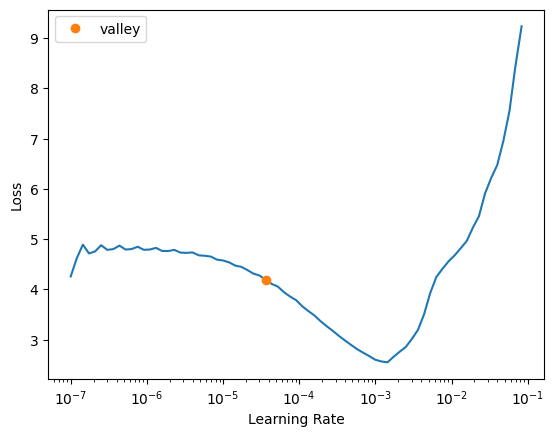

In [25]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
  def after_pred(self): self.learn.pred = self.pred[0]
      
      
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
cbs=[DropOutput], metrics=Perplexity()).to_fp16()

lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(50, lr)

# Result

In [26]:
prompt=" 사라져버린 summer time\
너의 두 눈이 나를 비추던 summer time\
기다리기만 하는 내가 아냐 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'사라져버린 summer time너의 두 눈이 나를 비추던 summer time기다리기만 하는 내가 아냐 넌 모른척 하나 못들은 척 지워버릴 오오 봄 사랑노래들이 너무해 나 우리의 첫 입맞춤을 떠올려 그럼 언제든 눈을 감고 음 가장 가까운 거리에서 내 이름을 불러줘 길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나의 모습을 감추고 걸음을 재촉하면 할수록 좋아 내게 왜 이러는지 부끄럼도 없는지 자존심은 곱게 접어 하늘위로 한 번도 못했던 말 어쩌면 다신 못할 바로 그것 때문에 그런 슬픈 말은 하지 말아'

# Model 저장

In [27]:
learn.model.save_pretrained("./models/kogpt2_IU_4")